# FACEBOOK Followers

In this notebook, we conduct some exploratory analysis on the Facebook Followers dataset. We aim at understanding the correlations between the attributes of the dataset, and looking for potential trends in public interactions.

In [1]:
#
# import required modules
#
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='fantasy', size=15)
plt.rc('axes.spines', right=False, top=False)
import pandas as pd
import numpy  as np
import seaborn as sns

In [2]:
# read the dataset
data = pd.read_csv('./temp_datalab_records_social_facebook.csv', low_memory=False)

In [3]:
# A glimpse at data
data.head(3)

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN


In [4]:
# create a datatime object based on `time` attribute
data.index = pd.to_datetime(data.time, format="%Y-%m-%d %I:%M:%S+00")

In [5]:
# mask the dubplicates,.... will keep the last value
data['duplicate'] = data.duplicated('facebook_id', keep='last')
data_wo_duplicate = data[~data['duplicate']]

## Correlation between different attributes

We compute the Pearson's linear correlation coefficient between the attributes (Check Ins, Were Here, Likes, and Talking About)

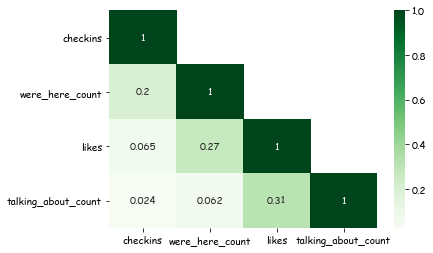

In [6]:
corr = data_wo_duplicate[['checkins', 'were_here_count', 'likes', 'talking_about_count']].corr()
mask = np.ones(corr.shape, '?')
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr,  annot=True, mask=mask, cmap=plt.cm.Greens)
plt.savefig('./figs/corrmax.png', dpi=300, bbox_inches='tight')

Based on this correlation matrix, it seems the number of "likes" is more correlated with the number of "talking about". It means people who are really activate on social media, tend to talk more. Also, to state the expected, the number of "check In" is more correlated with the number of "were here".

## Highest volatility of Likes, Talking About, Check Ins, Were Here

## Top Five Usernames

Let's look at the top five usernames in terms of number of likes, checkins, talking about, and were here counts. 

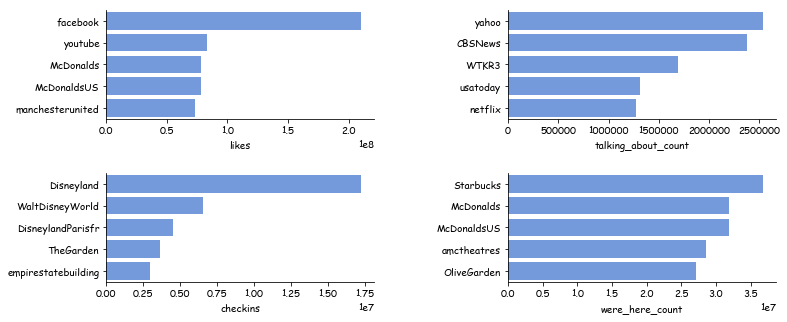

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax= ax.flatten()
sns.barplot(x='likes', y='username', data=data_wo_duplicate.sort_values(by=['likes'], ascending=False).iloc[:5,:],
            color='cornflowerblue', ax=ax[0])
sns.barplot(x='talking_about_count', y='username', data=data_wo_duplicate.sort_values(by=['talking_about_count'], ascending=False).iloc[:5,:],
            color='cornflowerblue', ax=ax[1])
sns.barplot(x='checkins', y='username', data=data_wo_duplicate.sort_values(by=['checkins'], ascending=False).iloc[:5,:],
            color='cornflowerblue', ax=ax[2])
sns.barplot(x='were_here_count', y='username', data=data_wo_duplicate.sort_values(by=['were_here_count'], ascending=False).iloc[:5,:],
            color='cornflowerblue', ax=ax[3])
for a in ax:a.set_ylabel('')
plt.savefig('./figs/barplots.png', dpi=300, bbox_inches='tight')

### Variations in Check In counts

Let's look at the variations in Check in counts per week

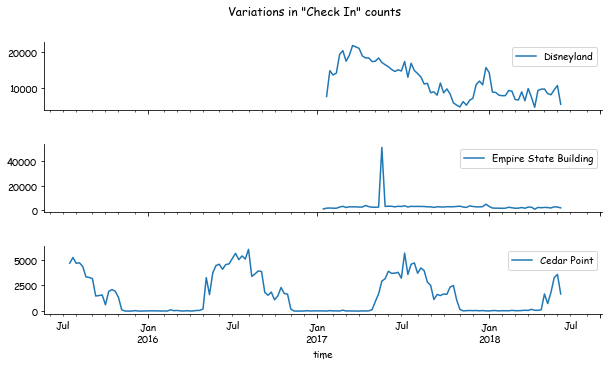

In [8]:
fig, ax= plt.subplots(nrows=3,figsize=(10,5), sharex=True)
plt.subplots_adjust(hspace=0.5)
data[data['username']=='Disneyland']['checkins'].resample('W').std().plot(label='Disneyland', ax=ax[0])
data[data['username']=='empirestatebuilding']['checkins'].resample('W').std().plot(label='Empire State Building', ax=ax[1])
data[data['username']=='cedarpoint']['checkins'].resample('W').std().plot(label='Cedar Point', ax=ax[2])
plt.suptitle('Variations in "Check In" counts')
for a in ax:a.legend()
plt.savefig('./figs/checkins.png', dpi=300, bbox_inches='tight')

Finding: The DisneyLand checkin counts ramps up about January and decreases by the begining of the summer. Cedar Point is pretty crowded during the summer.

### Monthly Mean of Talking About counts for Car companies

Let's look into the monthly average of Talking about counts for Car companies, including Chevrolet, Ford, and Tesla.

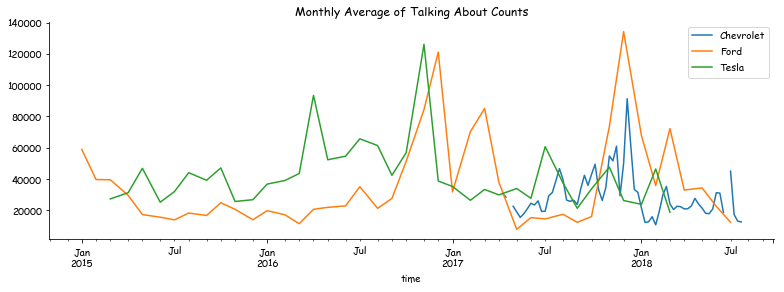

In [9]:
plt.figure(figsize=(13, 4))
data[data['username']=='chevrolet']['talking_about_count'].resample('W').mean().plot(label='Chevrolet')
data[data['username']=='ford']['talking_about_count'].resample('M').mean().plot(label='Ford')
data[(data['username']=='teslamotors') | (data['username']=='tesla')]['talking_about_count'].resample('M').mean().plot(label='Tesla')
plt.title('Monthly Average of Talking About Counts')
plt.legend()
plt.savefig('figs/cars.png', dpi=300, bbox_inches='tight')

Finding: Seems like people talk about cars more often around January.

### Yearly average of Talking About Count for Netflix and WWE

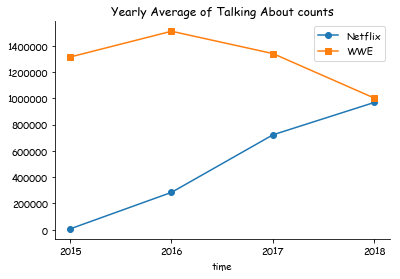

In [10]:
data[data['username']=='netflix']['talking_about_count'].resample('Y').mean().plot(label='Netflix', marker='o')
data[data['username']=='wwe']['talking_about_count'].resample('Y').mean().plot(label='WWE', marker='s')
plt.legend()
plt.title('Yearly Average of Talking About counts')
plt.savefig('./figs/netflix_wwe.png', dpi=300, bbox_inches='tight')

We can see that people tend to talk less about WWE, and the rate that people talking about NETFLIX is decreased relative to the previous year (compare 2018 with 2017).